In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("placement.csv")

In [25]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

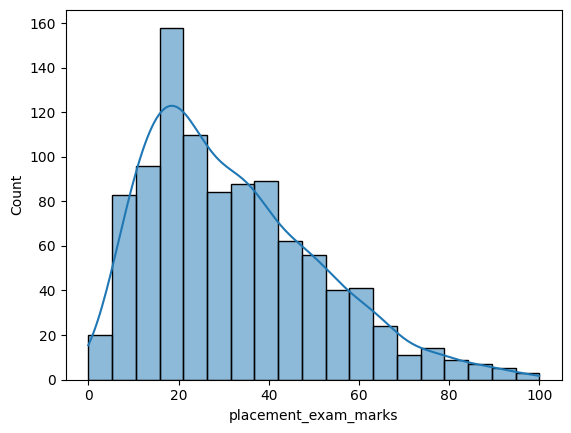

In [26]:
sns.histplot(df['placement_exam_marks'] , kde= True)

In [27]:
df.rename(columns = {'placement_exam_marks' : 'p_marks'} , inplace =True)

In [28]:
df

,cgpa,p_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [29]:
df['p_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: p_marks, dtype: float64

In [31]:
df['p_marks'].skew()

np.float64(0.8356419499466834)

In [32]:
two5 = df['p_marks'].quantile(0.25)
seven5 = df['p_marks'].quantile(0.75)

In [34]:
maxii = seven5 +1.5 *(seven5 - two5)
minii = two5 - 2.5*(seven5 - two5)

In [36]:
seven5,two5

(np.float64(44.0), np.float64(17.0))

In [35]:
maxii , minii

(np.float64(84.5), np.float64(-50.5))

In [41]:
new_df = df.copy()

In [42]:
new_df['p_marks'] = np.where( new_df['p_marks'] >maxii, maxii, np.where((new_df['p_marks'])<minii , minii, new_df['p_marks']))

In [43]:
new_df

,cgpa,p_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [44]:
df.isnull().sum()

cgpa       0
p_marks    0
placed     0
dtype: int64

<Axes: ylabel='p_marks'>

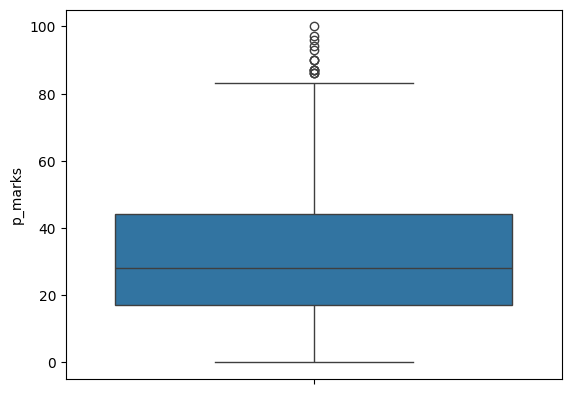

In [45]:
sns.boxplot(df['p_marks'])

<Axes: ylabel='p_marks'>

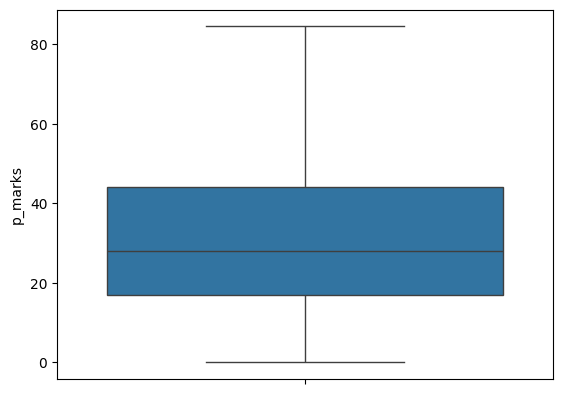

In [47]:
sns.boxplot(new_df['p_marks'])

<Axes: xlabel='p_marks', ylabel='Count'>

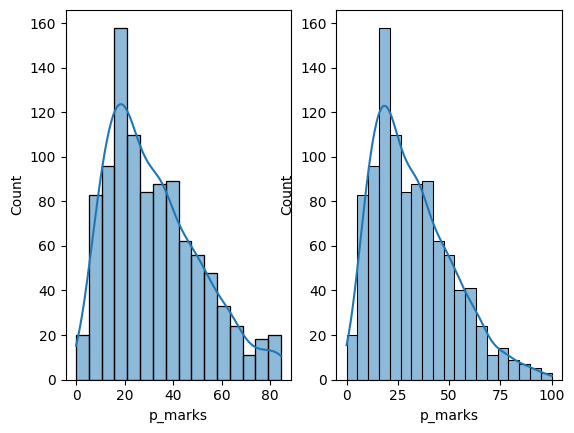

In [50]:
plt.subplot(1,2,1)
sns.histplot(new_df['p_marks'], kde =True)
plt.subplot(1,2,2)
sns.histplot(df['p_marks'], kde =True)